# Categorical Variables

## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency
import scipy.stats as stats

# classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

## Functions

In [49]:
# Function for Chi2 Test
def chi2_test(col1, col2):
    crosstab = pd.crosstab(col1, col2)
    chi2, p_value, dof, expected_freq = chi2_contingency(crosstab, correction=True)
    dict = {'Degrees of Freedom': dof, 'p-value': "{:.2f}".format(p_value), 'Critical Value': "{:.2f}".format(stats.chi2.ppf(1 - 0.05, df=dof)), 'Chi2 Value': "{:.2f}".format(chi2)}
    results = pd.DataFrame([dict], index=['results']).T
    exp_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index)
    return results, exp_freq

## Gather Cleaned Data

In [50]:
df = pd.read_csv(r'./../data/df_clean.csv') 
df.head()

,Unnamed: 0,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [51]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [52]:
categoricals = df.select_dtypes(object)
categoricals.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes


### Checking Distribution

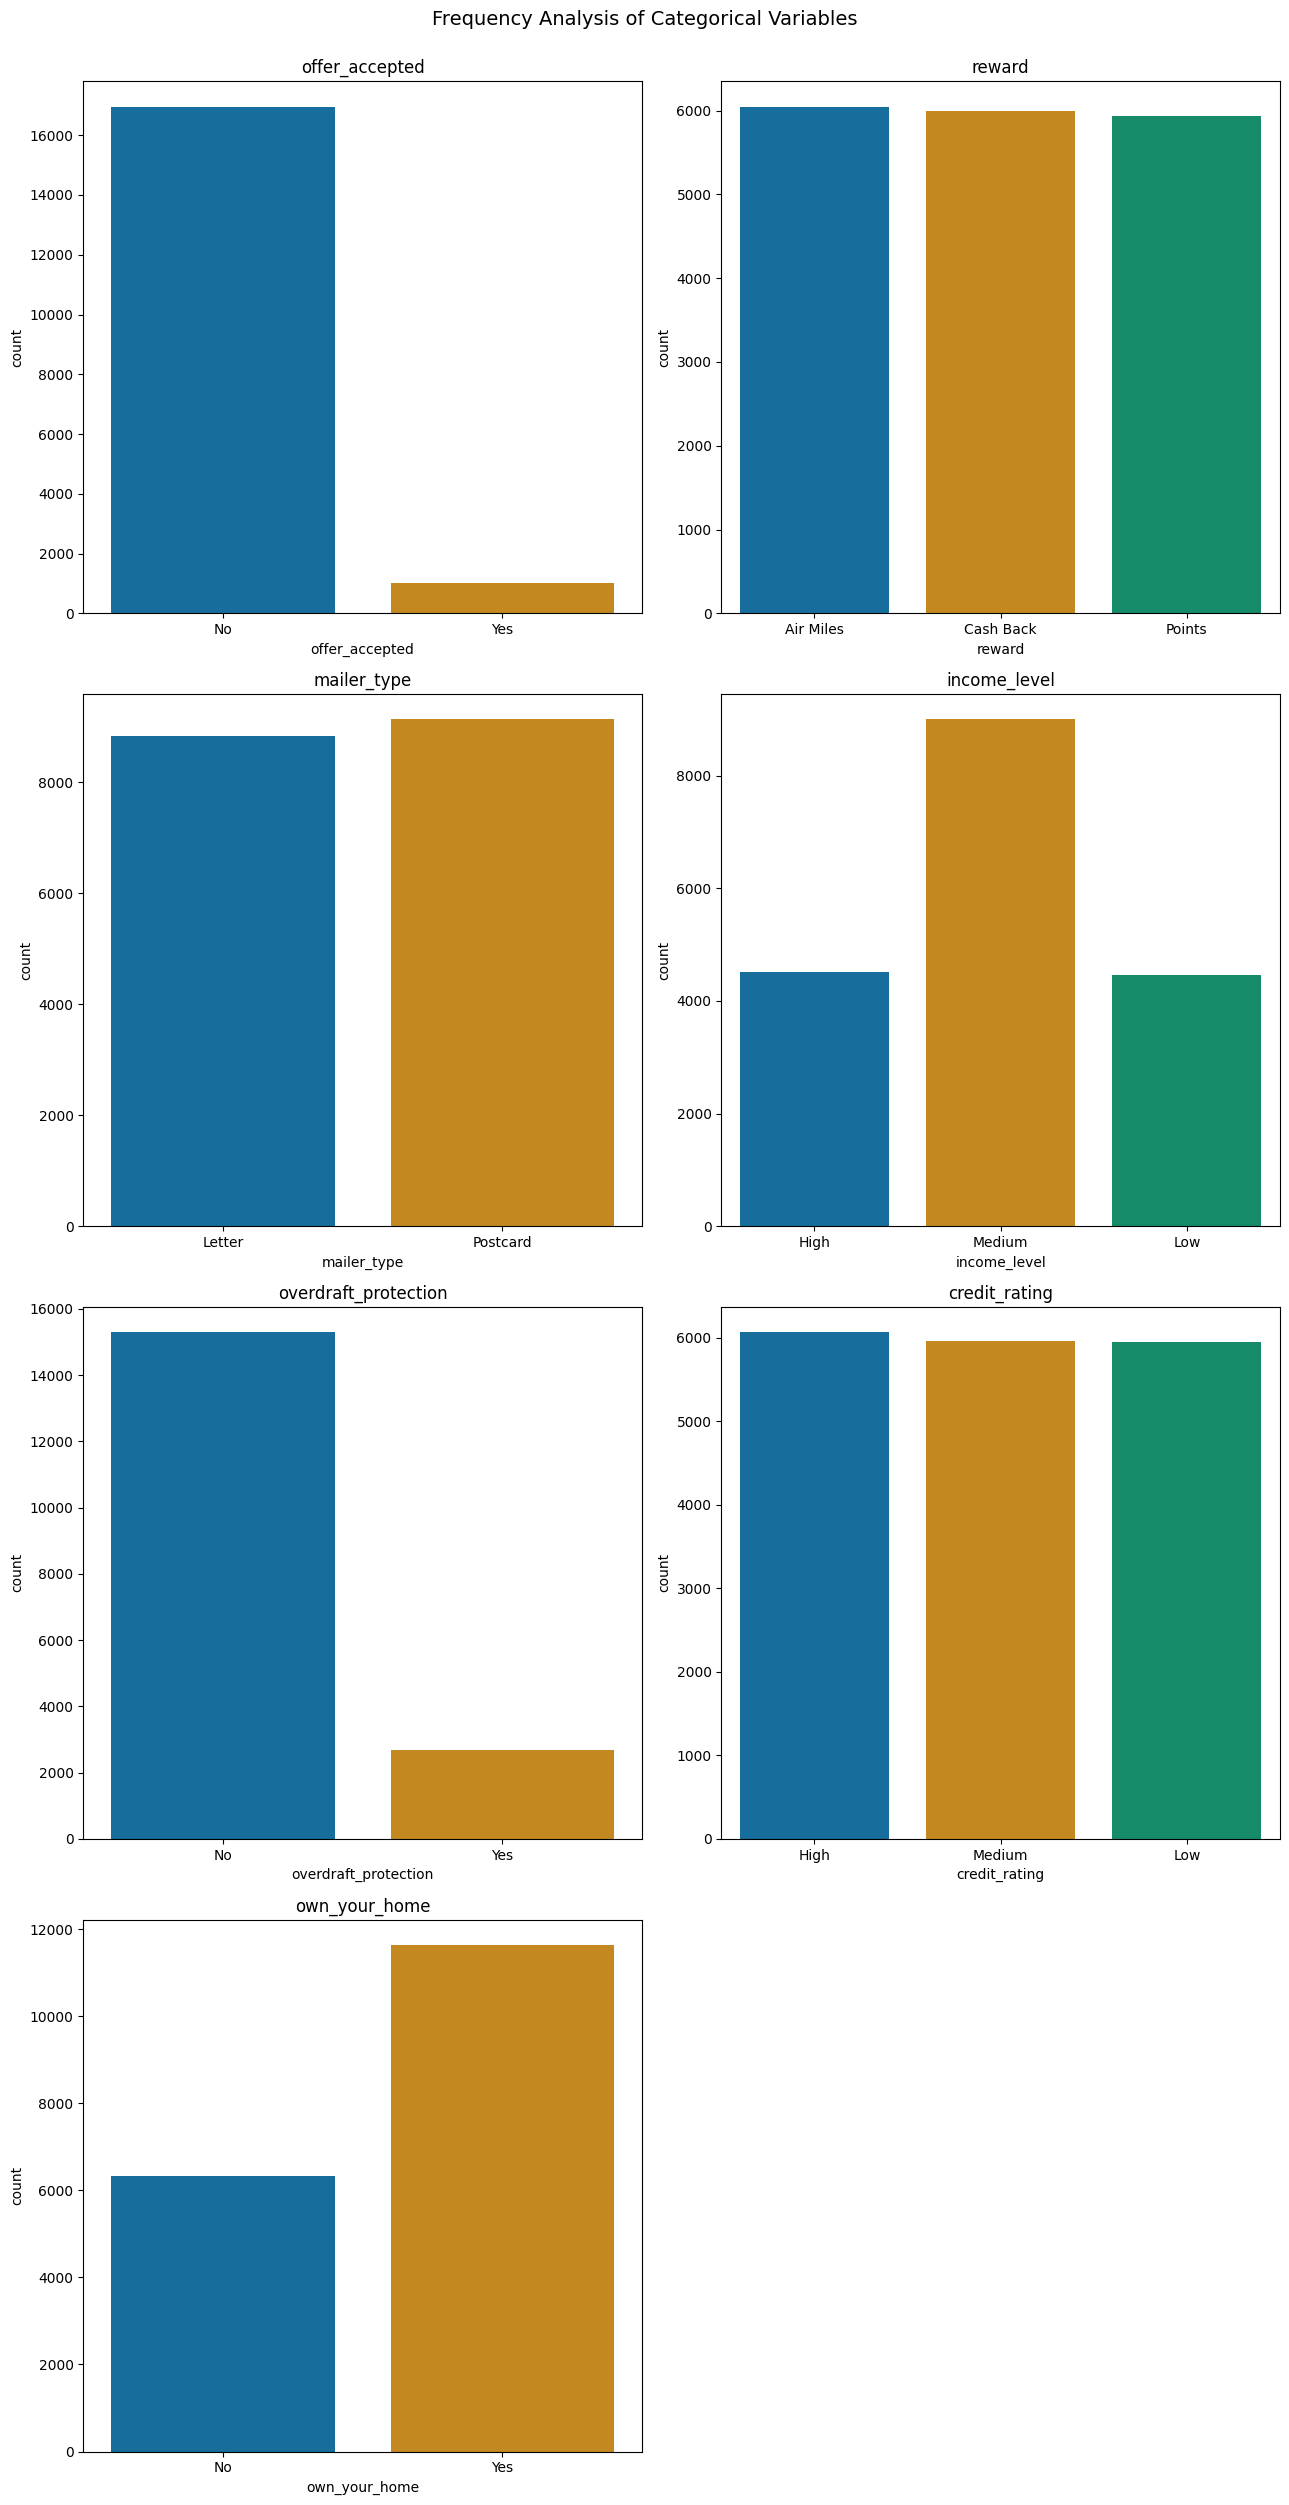

In [53]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (13,25))
plt.suptitle("Frequency Analysis of Categorical Variables", fontsize = 14, y=1)
sns.set_palette('colorblind')

for i in categoricals:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = categoricals, x = i)
    c = c + 1

plt.tight_layout()
plt.show()

### Distribution vis-à-vis Target

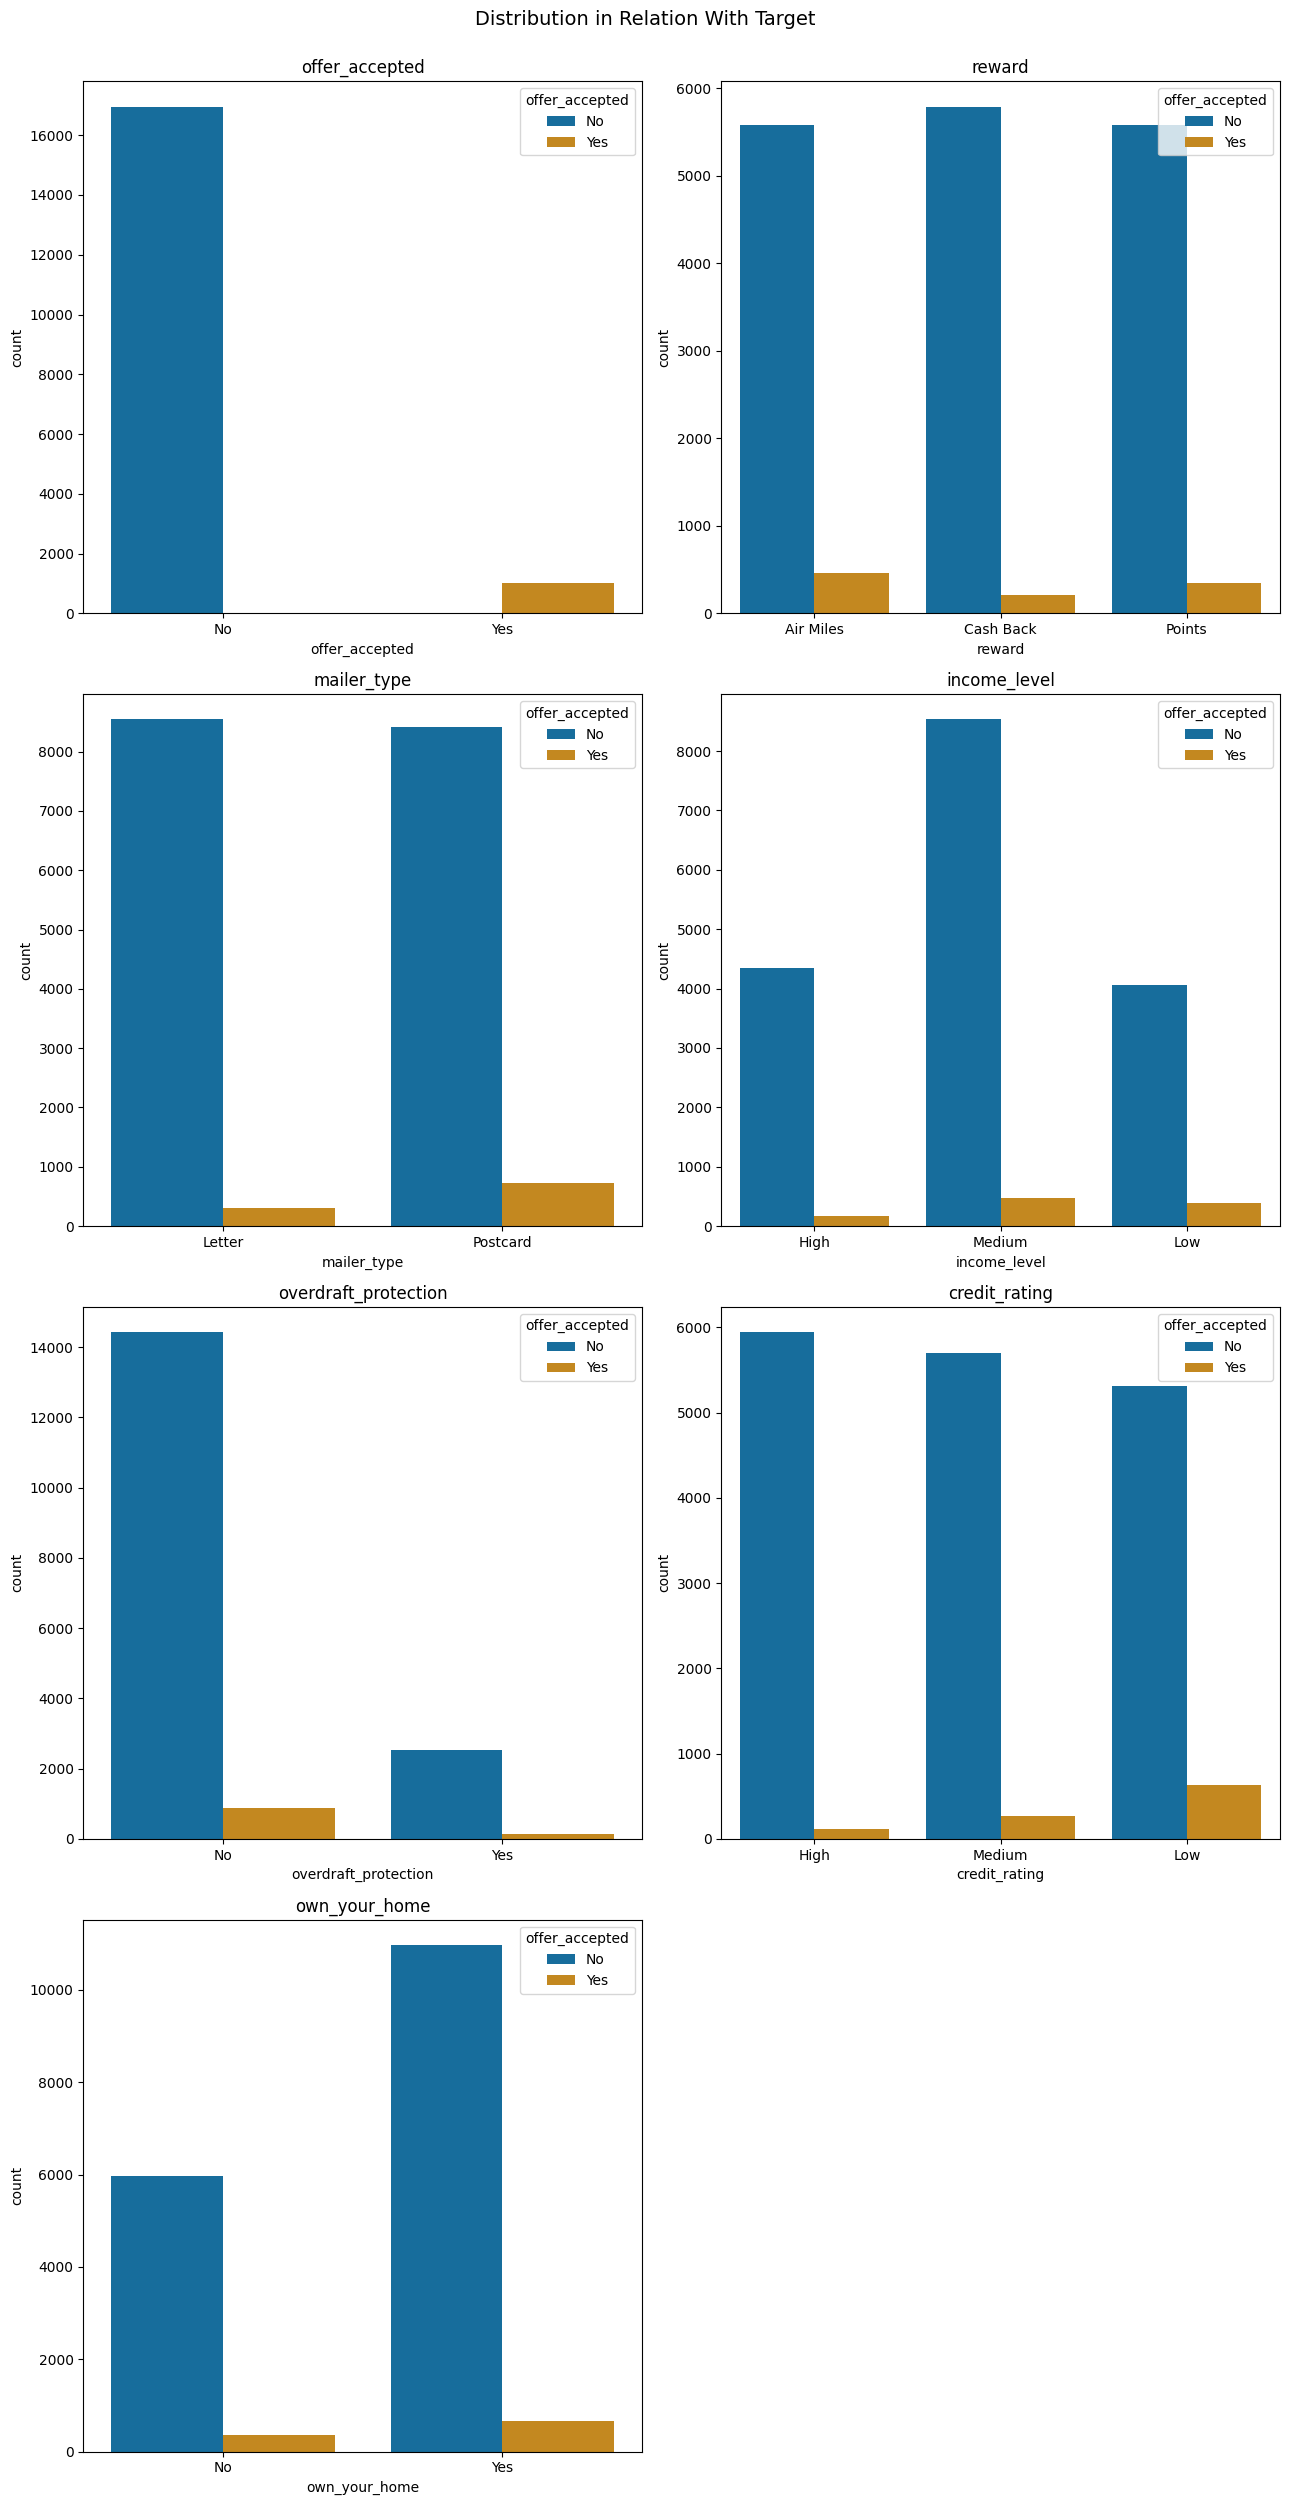

In [54]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (13,25))
plt.suptitle("Distribution in Relation With Target", fontsize = 14, y=1)
sns.set_palette('colorblind')

for i in categoricals:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = categoricals, x = i, hue=('offer_accepted'))
    c = c + 1

plt.tight_layout()
plt.show()

### Checking Outliers in relation with Average Balance

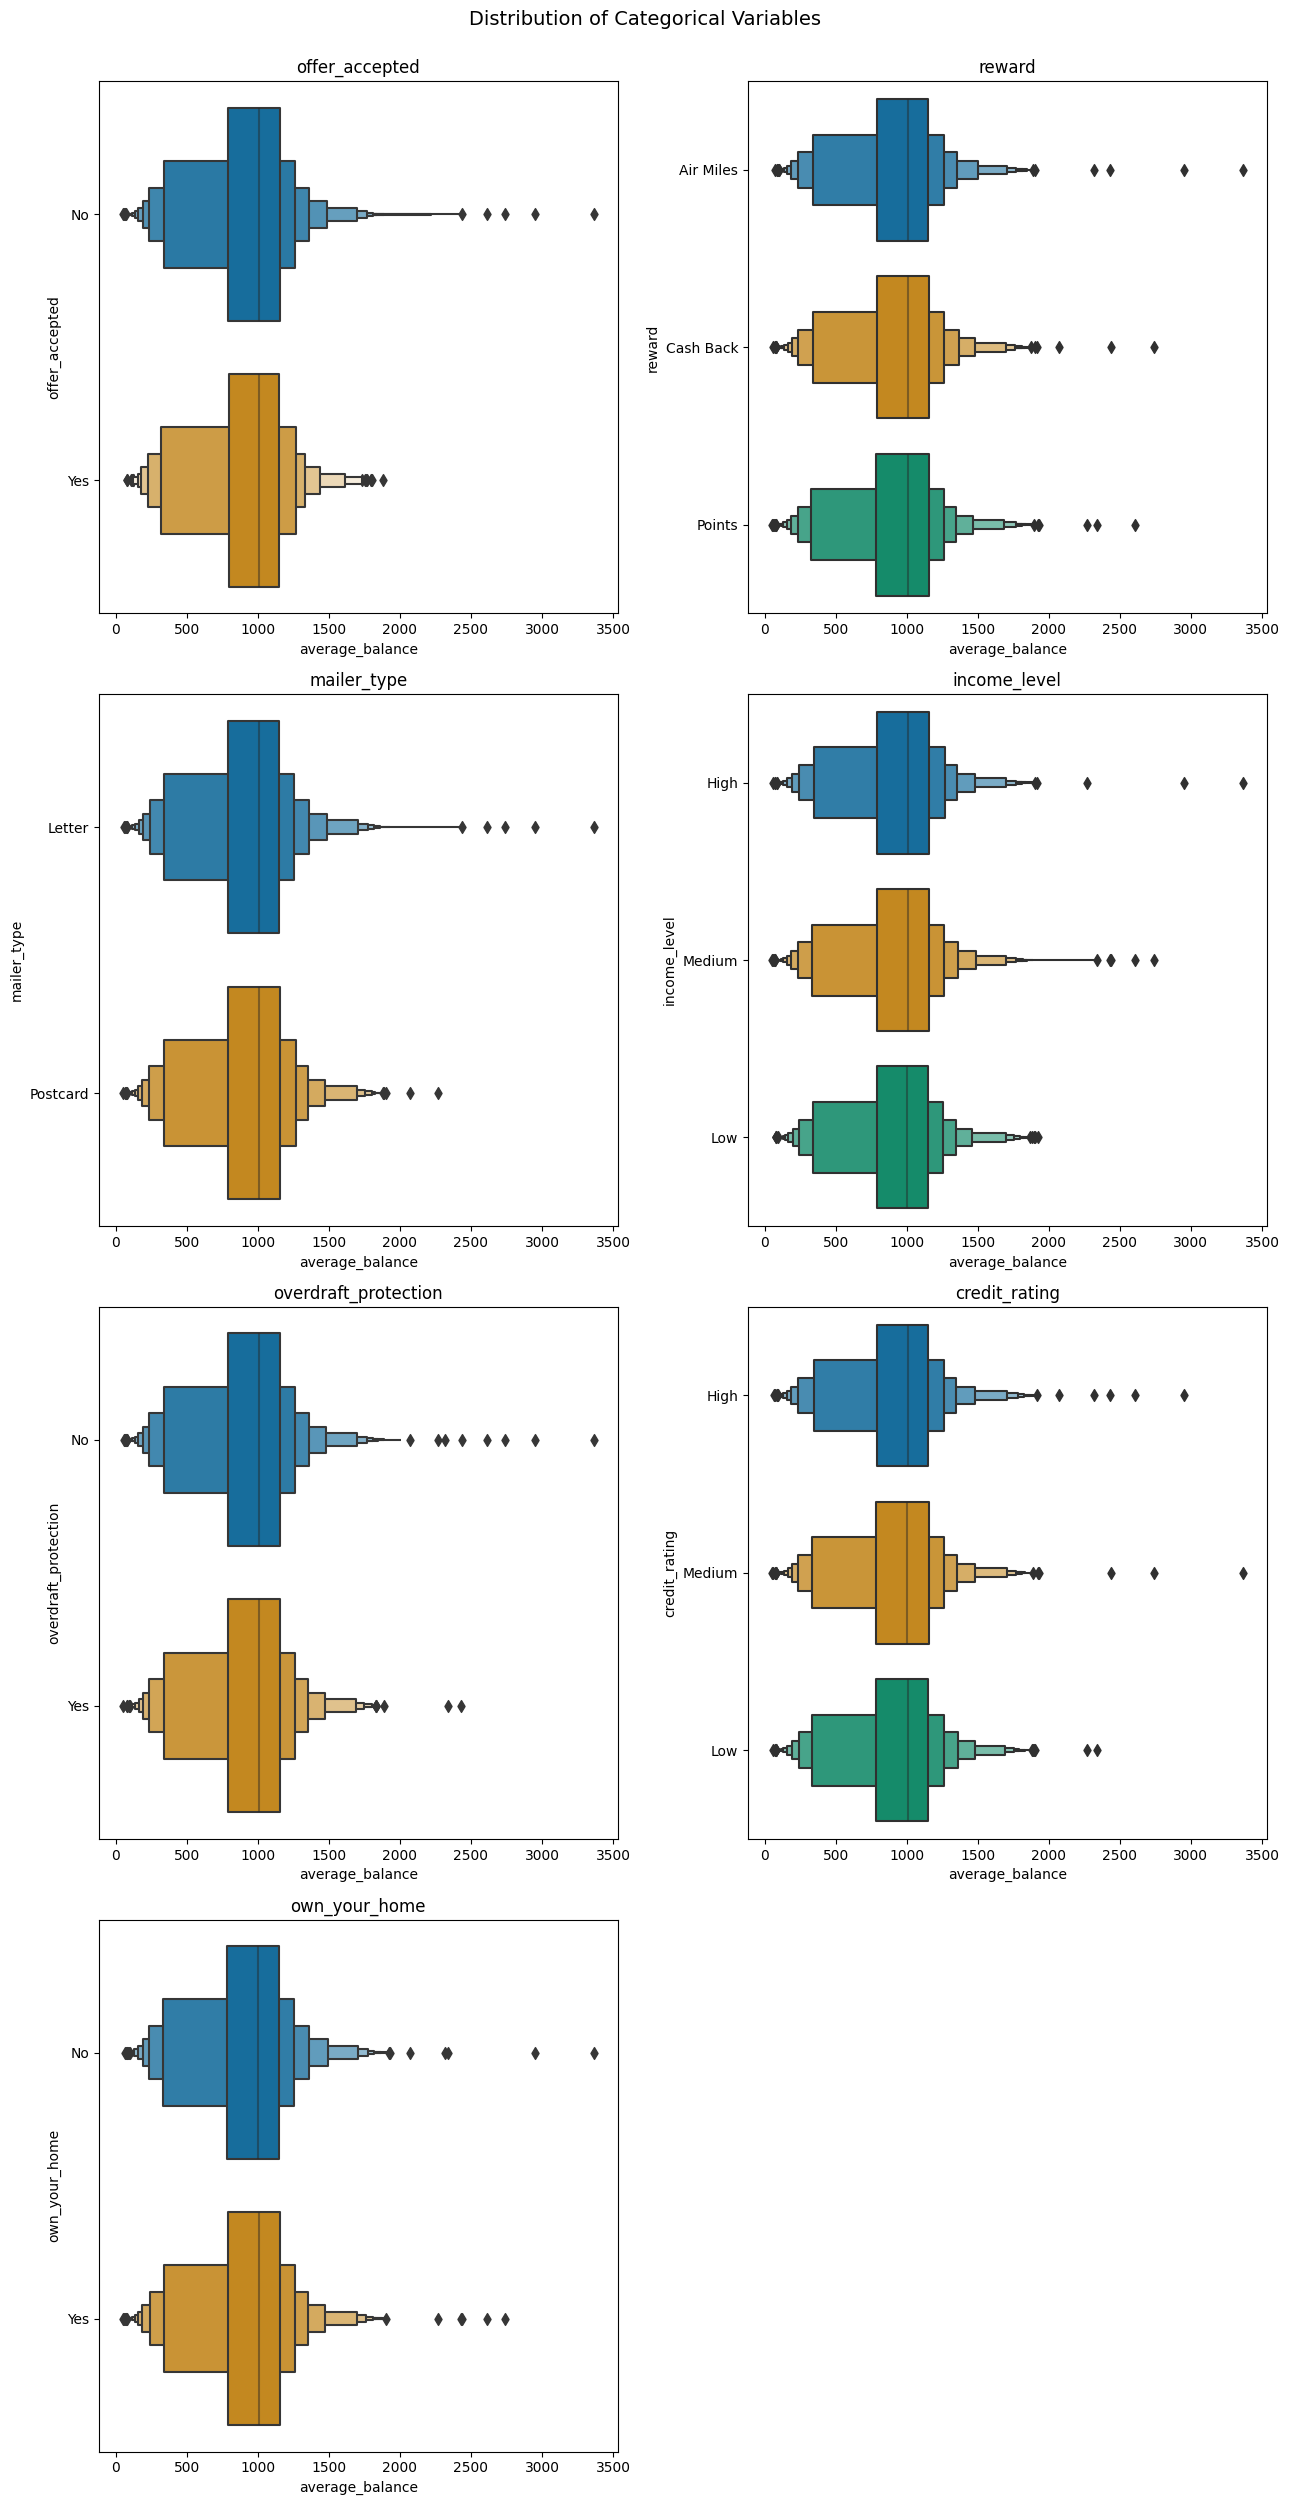

In [55]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (13,25))
plt.suptitle("Distribution of Categorical Variables", fontsize = 14, y=1)
sns.set_palette('colorblind')

for i in categoricals:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxenplot(x = df.average_balance, y = categoricals[i])
    c = c + 1

plt.tight_layout()
plt.show()

## Correlation: Target VS Average Balance

#### ANOVA

For one-way ANOVA, the hypotheses for the test are the following:
- The null hypothesis (H0) is that the group means are all equal.
- The alternative hypothesis (HA) is that not all group means are equal.

In [56]:
offer_bal = df[['offer_accepted', 'average_balance']]
offer_bal.head()

,offer_accepted,average_balance
0,No,1160.75
1,No,147.25
2,No,276.50
3,No,1219.00
4,No,1211.00


In [57]:
from scipy.stats import f_oneway
offer_bal_grouped = offer_bal.groupby('offer_accepted')['average_balance'].apply(list)
offer_bal_grouped.head()

offer_accepted
No     [1160.75, 147.25, 276.5, 1219.0, 1211.0, 1114....
Yes    [769.5, 851.25, 931.75, 1192.75, 1329.5, 908.5...
Name: average_balance, dtype: object

In [58]:
anova_offer_bal = f_oneway(*offer_bal_grouped)
anova_offer_bal

F_onewayResult(statistic=0.2702874265424917, pvalue=0.603145431893136)

## Correlation: Homes Owned VS Number of Homes

Checking if these 2 variables are identical

In [59]:
homes = df[['homes_owned', 'own_your_home']]
homes.head()

,homes_owned,own_your_home
0,1,No
1,2,Yes
2,1,Yes
3,1,No
4,1,Yes


In [60]:
homes.homes_owned.unique()

array([1, 2, 3])

<Axes: xlabel='own_your_home', ylabel='homes_owned'>

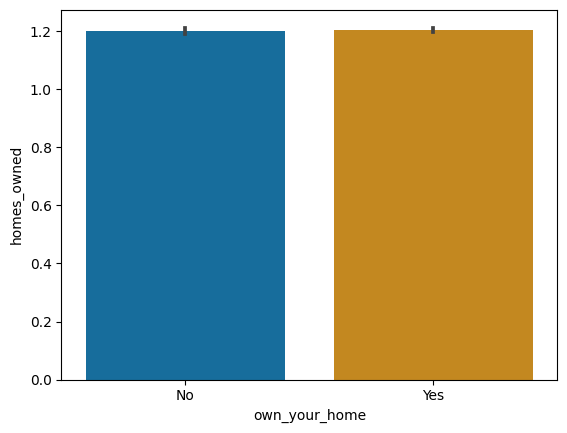

In [61]:
sns.barplot(data = homes, x='own_your_home', y = 'homes_owned')

#### ANOVA

In [62]:
from scipy.stats import f_oneway
homes_grouped = homes.groupby('own_your_home')['homes_owned'].apply(list)
homes_grouped.head()

own_your_home
No     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ...
Yes    [2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, ...
Name: homes_owned, dtype: object

In [63]:
anova_homes = f_oneway(*homes_grouped)
anova_homes 

F_onewayResult(statistic=0.32046774616446744, pvalue=0.571333749622607)

> **Note:** ANOVA usually between a categorical and continuous var sp doesn't make sense for a discrete numerical?

#### Spearman's Correlation

In [64]:
homes_int = homes.copy()
homes_int.own_your_home = homes_int.own_your_home.map({'No': 0, 'Yes': 1})
homes_int.value_counts()

homes_owned  own_your_home
1            1                9368
             0                5134
2            1                2152
             0                1137
3            1                 116
             0                  69
Name: count, dtype: int64

In [65]:
homes_int.corr(method='spearman').round(2)

,homes_owned,own_your_home
homes_owned,1.00,0.01
own_your_home,0.01,1.00


> **Note:** Using spearman's method of correlation, here doesn't seem to be any correlation between the 2

#### Chi2 Test

In [66]:
result, exp_freq = chi2_test(homes.homes_owned, homes.own_your_home)
display(result), display(exp_freq)

,results
Degrees of Freedom,2
p-value,0.56
Critical Value,5.99
Chi2 Value,1.15


own_your_home,No,Yes
homes_owned,,
1,5114.746328,9387.253672
2,1160.005563,2128.994437
3,65.248109,119.751891


(None, None)

**Accept H0, columns are not related.**
- p-value > alpha 0.05
- Chi2 value < than critical value


## Chi2 Tests: Target VS Categorical Variables

### Target VS Reward

In [67]:
reward = categoricals[['offer_accepted', 'reward']]

In [68]:
result, exp_freq = chi2_test(reward.offer_accepted, reward.reward)
display(result), display(exp_freq)

,results
Degrees of Freedom,2
p-value,0.00
Critical Value,5.99
Chi2 Value,101.15


reward,Air Miles,Cash Back,Points
offer_accepted,,,
No,5703.542779,5654.496273,5596.960948
Yes,343.457221,340.503727,337.039052


(None, None)

**Reject H0, columns are related.**
- p-value is 0 < alpha 0.05
- Chi2 value > than the critical value


### Target VS Mailer Type

In [78]:
result, exp_freq = chi2_test(categoricals.offer_accepted, categoricals.mailer_type)
display(result), display(exp_freq)

,results
Degrees of Freedom,1
p-value,0.00
Critical Value,3.84
Chi2 Value,169.04


mailer_type,Letter,Postcard
offer_accepted,,
No,8339.792501,8615.207499
Yes,502.207499,518.792501


(None, None)

**Reject H0, columns are related.**
- p-value is 0 which is less than alpha 0.05
- Chi2 value is much higher than the critical value


### Target VS Income Level

In [71]:
result, exp_freq = chi2_test(categoricals.offer_accepted, categoricals.income_level)
display(result), display(exp_freq)

,results
Degrees of Freedom,2
p-value,0.00
Critical Value,5.99
Chi2 Value,113.62


income_level,High,Low,Medium
offer_accepted,,,
No,4262.330051,4201.96512,8490.704829
Yes,256.669949,253.03488,511.295171


(None, None)

**Reject H0, columns are related.**
- p-value is 0 < alpha 0.05
- Chi2 value > than the critical value

### Target VS Credit Rating

In [72]:
result, exp_freq = chi2_test(categoricals.offer_accepted, categoricals.credit_rating)
display(result), display(exp_freq)

,results
Degrees of Freedom,2
p-value,0.00
Critical Value,5.99
Chi2 Value,445.06


credit_rating,High,Low,Medium
offer_accepted,,,
No,5719.577214,5610.165777,5625.257009
Yes,344.422786,337.834223,338.742991


(None, None)

**Reject H0, columns are related.**
- p-value is 0 < alpha 0.05
- Chi2 value > than the critical value

### Target VS Household Size

In [73]:
result, exp_freq = chi2_test(categoricals.offer_accepted, df.household_size)
display(result), display(exp_freq)

,results
Degrees of Freedom,7
p-value,0.00
Critical Value,14.07
Chi2 Value,26.14


household_size,1,2,3,4,5,6,8,9
offer_accepted,,,,,,,,
No,508.385903,2649.454551,5380.967679,5217.793725,2689.069036,507.442701,0.943202,0.943202
Yes,30.614097,159.545449,324.032321,314.206275,161.930964,30.557299,0.056798,0.056798


(None, None)

**Reject H0, columns are related. Columns are related.**
- p-value is 0 which is less than alpha 0.05
- Chi2 value is much higher than the critical value


### Target VS Credit Cards Held

In [74]:
result, exp_freq = chi2_test(categoricals.offer_accepted, df.credit_cards_held)
display(result), display(exp_freq)

,results
Degrees of Freedom,3
p-value,0.72
Critical Value,7.81
Chi2 Value,1.35


credit_cards_held,1,2,3,4
offer_accepted,,,,
No,5797.862984,7482.42184,3188.966121,485.749054
Yes,349.137016,450.57816,192.033879,29.250946


(None, None)

**Accept H0, columns are not related.**
- p-value is 0 which > alpha 0.05
- Chi2 value is less than the critical value

### Target VS Overdraft Protection

In [77]:
result, exp_freq = chi2_test(categoricals.offer_accepted, df.overdraft_protection)
display(result), display(exp_freq)

,results
Degrees of Freedom,1
p-value,0.75
Critical Value,3.84
Chi2 Value,0.10


overdraft_protection,No,Yes
offer_accepted,,
No,14430.991322,2524.008678
Yes,869.008678,151.991322


(None, None)

**Accept H0, columns are not related.**
- p-value is 0 which > alpha 0.05
- Chi2 value is lesser than the critical value
